In [2]:
features=pd.read_csv('C:\\Users\joeba\OneDrive\Desktop\Python Data sets\Features data set.csv')
sales=pd.read_csv('C:\\Users\joeba\OneDrive\Desktop\Python Data sets\sales data-set.csv')
stores=pd.read_csv('C:\\Users\joeba\OneDrive\Desktop\Python Data sets\stores data-set.csv')

NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
features=pd.read_csv('C:\\Users\joeba\OneDrive\Desktop\Python Data sets\Features data set.csv')
sales=pd.read_csv('C:\\Users\joeba\OneDrive\Desktop\Python Data sets\sales data-set.csv')
stores=pd.read_csv('C:\\Users\joeba\OneDrive\Desktop\Python Data sets\stores data-set.csv')

In [7]:
from sktime.utils.plotting.forecasting import plot_ys
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.exp_smoothing import ExponentialSmoothing 


ModuleNotFoundError: No module named 'sktime'

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import pandas as pd

In [10]:
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')

In [11]:

df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')

# Replace N/A with 0 and convert temperature to Celsius

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

# Set types to be a factor rather than a string

#types_encoded, types =df['Type'].factorize()
#df['Type'] = types_encoded

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


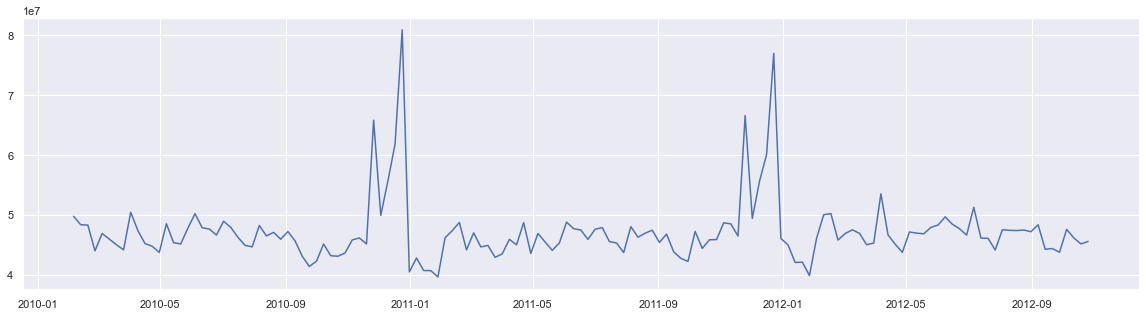

In [12]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [14]:
df_average_sales = df_average_sales_week.sort_values('Date', ascending=True)

ts = df_average_sales_week.set_index('Date')

ts.index = pd.date_range(start='2010-02-05', end='2012-10-26', freq='7D')


In [15]:
df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [16]:
levels = df[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','Size']]
levels.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
0,2010-02-05,24924.50,5.727778,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,151315
1,2010-02-12,46039.49,3.616667,2.548,211.242170,8.106,0.0,0.0,0.0,0.0,0.0,151315
2,2010-02-19,41595.55,4.405556,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,0.0,151315
3,2010-02-26,19403.54,8.127778,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,0.0,151315
4,2010-03-05,21827.90,8.055556,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,0.0,151315


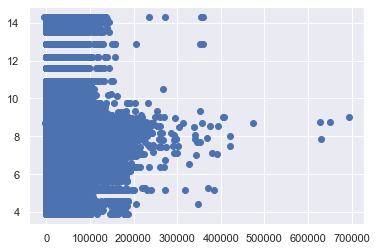

In [17]:
Correlation = levels['Weekly_Sales'].corr(levels['Unemployment'])
plt.scatter(levels['Weekly_Sales'],levels['Unemployment'])

In [19]:

# Compute correlation of levels
correlation1 = levels['Weekly_Sales'].corr(levels['MarkDown5'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.set_index('Date')
changes = changes.pct_change()
correlation2 = changes['Weekly_Sales'].corr(changes['MarkDown5'])
print("Correlation of changes: ", correlation2)

df_average_sales_week.index = pd.to_datetime(df_average_sales_week.Date)

Correlation of levels:  0.050465293337907086
Correlation of changes:  nan


The autocorrelation is:  -0.3615388986984413


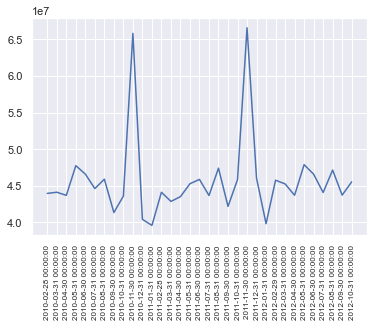

In [20]:
# Autocorrelation of sales data
ts1 = ts.resample(rule='M').last()

ts1['Return'] = ts1['Weekly_Sales'].pct_change()

autocorrelation = ts1['Return'].autocorr()
print("The autocorrelation is: ",autocorrelation)

#plt.plot(ts1.index,ts1['Weekly_Sales'])
x = np.arange(0,len(ts1),1)
fig, ax = plt.subplots(1,1)
ax.plot(x,ts1['Weekly_Sales'])
ax.set_xticks(x)
ax.set_xticklabels(ts1.index)
plt.xticks(rotation=90,fontsize = 8)
plt.show()

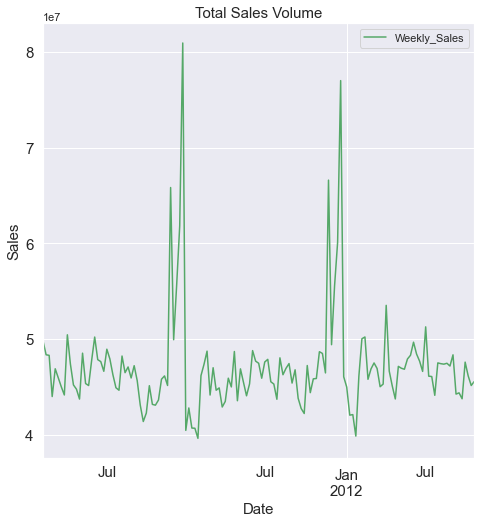

In [22]:
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121)
levels = levels.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
levels["Date"] = pd.to_datetime(levels["Date"])
levels.plot(x="Date",y="Weekly_Sales",color="g",ax=ax1, fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.title("Total Sales Volume", fontsize=15)
plt.ylabel("Sales", fontsize=15)
year_locator = mdates.YearLocator()
ax1.xaxis.set_major_locator(year_locator)


In [25]:

from statsmodels.tsa.stattools import adfuller

results = adfuller(ts['Weekly_Sales'])

print("The p-values is: " + str(results[1]))
print("\n")
print(results)


The p-values is: 2.6759791589862847e-07


(-5.908297957186316, 2.6759791589862847e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.46014989216)


C:\Users\joeba\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


[ 1.          0.33740034  0.22062903  0.07237072  0.17385451 -0.23191845
 -0.15784759 -0.08470098 -0.07518064 -0.12806261 -0.10594217 -0.0569027
 -0.10607277 -0.11128366 -0.09176246  0.01405238  0.00254805  0.00357038
 -0.04464742 -0.0071724  -0.03018732 -0.06308626 -0.05262036  0.01851845
  0.07355479  0.0898217   0.07872612  0.06787347  0.08965113  0.05078368
 -0.05883777 -0.09798936 -0.04892347 -0.0321189  -0.05199942 -0.01435438
 -0.0278777  -0.00211725 -0.05878667 -0.13084697 -0.12009487]


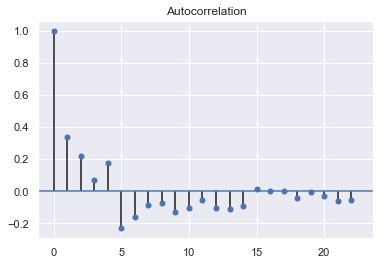

In [28]:

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

# Compute the acf array of df_average_sales_week
ts = ts[['Weekly_Sales']]
acf_array = acf(ts)
print(acf_array)

# Plot the acf function
plot_acf(ts,alpha=1)
plt.show()

The autocorrelation of weekly MSFT returns is -0.36
The approximate confidence interval is +/- 0.16


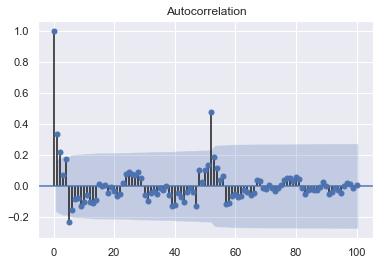

In [30]:

# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(ts)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 100 lags using plot_acf
plot_acf(ts, alpha=0.05, lags=100)
plt.show()

C:\Users\joeba\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


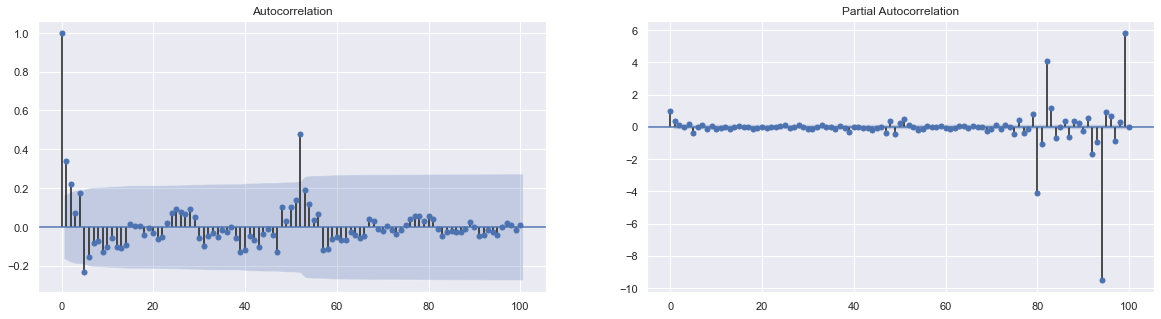

In [31]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=100, ax=axes[1])
plt.show()

            Weekly_Sales
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12   -3825343.99
2010-03-19   -3347702.99
2010-03-26   -4143032.73
2010-04-02    6455260.13
2010-04-09     493820.14


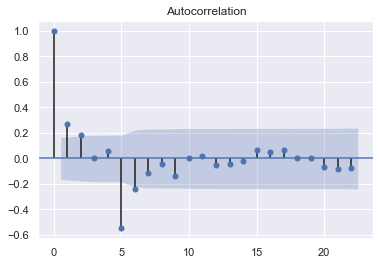

In [32]:

tssa = ts.diff(5)

# Print the first 10 rows of the seasonally adjusted series
print(tssa.head(10))

# Drop the NaN data in the first four rows
tssa = tssa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(tssa)
plt.show()

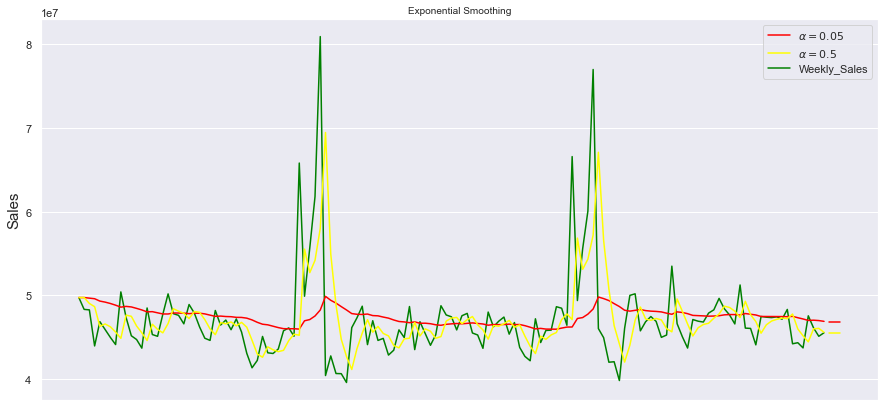

In [40]:
fit1 = ExponentialSmoothing(levels["Weekly_Sales"][0:143]).fit(smoothing_level=0.05, optimized=False)

fit2 = ExponentialSmoothing(levels["Weekly_Sales"][0:143]).fit(smoothing_level=0.5, optimized=False)

cast1 = fit1.forecast(3).rename(r'$\alpha=0.05$')
cast2 = fit2.forecast(3).rename(r'$\alpha=0.5$')
plt.figure(figsize=(15,7))

cast1.plot(color='red', legend=True)
cast2.plot(color='yellow', legend=True)
levels["Weekly_Sales"][0:200].plot(marker='',color='green', legend=True)
plt.ylabel("Sales", fontsize=15)

fit1.fittedvalues.plot(color='red')
fit2.fittedvalues.plot(color='yellow')

plt.title("Exponential Smoothing", fontsize=10)
plt.xticks([], minor=True)
plt.show()

In [35]:
levels.shape 

(143, 2)

In [43]:
import statsmodels.api as sm 
decomposition = sm.tsa.seasonal_decompose(data, model = 'multiplicative')
fig = decompostion.plot()

NameError: name 'data' is not defined

In [68]:
levels.index.freq = 'WS'

In [69]:
train = levels.iloc[:130]
test = levels.iloc[130:]


In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [71]:
model = ExponentialSmoothing(train['Weekly_Sales'], trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

C:\Users\joeba\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\joeba\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [77]:
levels.plot(figsize =(12,8))
model.plot_predict()

AttributeError: 'HoltWintersResults' object has no attribute 'plot_predict'

ValueError: view limit minimum -3276072.3800000036 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 864x576 with 1 Axes>

,Date,Weekly_Sales
133,2012-08-24,47447323.60
134,2012-08-31,47159639.43
135,2012-09-07,48330059.31
136,2012-09-14,44226038.65
137,2012-09-21,44354547.11
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57
142,2012-10-26,45544116.29
